# PART II: Optimization
###### Group 7 - Anne Li Cnossen, Odette Roest, Sydney Koppes and Fleur Giesselbach

In [188]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.stats as sts
import statsmodels.graphics.gofplots as sm

## Problem definition: simulation of a tandem line
$I$ multi-server stations with finite buffer slots <br>
$S_i$ number of servers at station $i$ <br>
$C_i$ number of buffer slots at station $i$ <br>
<br>
Arrival process at the fist station follows a $Poisson(\lambda)$ process. <br>
Service times are exponentially distributed with rate $\mu_i$ for all $S_i$ machines in station $i$. <br>
Blocking After Service (BAS) is applied.

### Problem instance

In [189]:
I = 4   

S1 = 1
S2 = 1
S3 = 1
S4 = 1

C1 = 5
C2 = 6
C3 = 6
C4 = 3

lambda_rate = 2.1

### 1. States 
States are given by $$(x_1, x_2, x_3, x_4, \delta_1, \delta_2, \delta_3)$$ where $x_i$ := number of jobs at station $i$, including the server, which is always smaller or equal to $C_i + S_i$ <br>
$\delta_i$ := indicating how many servers are blocked at station $i$, which is always smaller or equal to $S_i$  

### 2. Events
$$\{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\}$$
where $\alpha = \text{arrival of a new job}$ and $\beta_i = \text{service completion of server } i \;\text{with}\; i = 1,2,3,4$ 

### 3. Event lists
The system is completely empty:
$$L((0,0,0,0,0,0,0)) = \{\alpha\}$$

One station is busy, no station is blocked:
$$L((x_1,0,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1\} & x_1 \in \{1,2,..,C_1+S_1-1\} \\
    \{\beta_1\} & x_1 = C_1+S_1 \\
\end{cases}
$$
$$L((0,x_2,0,0,0,0,0)) = \{\alpha, \beta_2\} \;\;\;\; x_2 \in \{1,2,..,C_2+S_2\}  $$
$$L((0,0,x_3,0,0,0,0)) = \{\alpha, \beta_3\} \;\;\;\; x_3 \in \{1,2,..,C_3+S_3\}  $$
$$L((0,0,0,x_4,0,0,0)) = \{\alpha, \beta_4\} \;\;\;\; x_4 \in \{1,2,..,C_4+S_4\}  $$

All stations are busy, but no station is blocked:
$$L((x_1,x_2,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
    \{\beta_1, \beta_2, \beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
\end{cases}
$$

At least two stations are busy, but no station is blocked:
$$L((x_1,0,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
    \{\beta_1,\beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
\end{cases}
$$
$$L((x_1,x_2,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
    \{\beta_1,\beta_2, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
\end{cases}
$$
$$L((x_1,x_2,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
    \{\beta_1,\beta_2, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
\end{cases}
$$
$$L((x_1,0,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
    \{\beta_1,\beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
\end{cases}
$$
$$L((x_1,0,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
    \{\beta_1, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
\end{cases}
$$
$$L((x_1,x_2,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
    \{\beta_1, \beta_2\} &  x_1 = C_1+S_1 \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
\end{cases}
$$
$$L((0,x_2,x_3,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 $$
$$L((0,0,x_3,x_4,0,0,0)) = \{\alpha, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 $$
$$L((0,x_2,0,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 $$
$$L((0,x_2,x_3,0,0,0,0)) = \{\alpha, \beta_2, \beta_3\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 $$
The system is completely full and blocked:
$$L((x_1,x_2,x_3,x_4,S_1,S_2,S_3)) = \{\beta_4\} \;\;\;\; x_i = C_i + S_i \;\text{for}\; i = 1,2,3,4  $$
If one or two stations are completely blocked, the event of a completion of a server in the corresponding station is deleted from the event list.  

## CLASSES

In [190]:
class State(object): 
    def __init__(self, _x1 = 0, _x2 = 0, _x3=0, _x4=0, _delta1=0, _delta2=0, _delta3=0):
        self.x1 = _x1
        self.x2 = _x2 
        self.x3 = _x3
        self.x4 = _x4
        self.delta1 = _delta1
        self.delta2 = _delta2
        self.delta3 = _delta3 
    
    def printState(self):
        print('(', self.x1, ', ', self.x2, ', ', self.x3, ', ', self.x4, ', ', self.delta1, ', ', self.delta2, ', ', self.delta3, ')')

class Event(object): 
    def __init__(self, _time = np.inf, _type = ''):
        self.time = _time
        self.type = _type 
    
    def getTime(self): 
        return self.time
    
    def getType(self): 
        return self.type
    
    def printEvent(self): 
        print('(', self.time, ',', self.type, ')', end = ' ')
        

class EventList(object):
    def __init__(self, _elist=[]):
        self.elist = _elist 
    
    def addEvent(self, event): 
        if len(self.elist)==0: 
            self.elist = [event]
        else:
            time_event = event.getTime()
            if time_event > self.elist[-1].getTime():
                self.elist.append(event)
            else: 
                event_start = next(event for event in self.elist if event.getTime() > time_event)
                event_index = self.elist.index(event_start)
                self.elist.insert(event_index, event)
    
    def getFirstEvent(self):
        ''' 
        Gets first item on the list and removes item from the list 
        '''
        first_event = self.elist.pop(0)
        return first_event

    def printEventList(self): 
        for event in self.elist:
            event.printEvent()
        print('')

class CounterSimulation(object):
    def __init__(self, _numServed = 0,_numDeparted = 0, _scoreFunction1 = 0, _scoreFunction2 = 0, _scoreFunction3 = 0, _scoreFunction4 = 0): 
        self.numServed = _numServed 
        self.numDeparted = _numDeparted
        self.scoreFunction1 = _scoreFunction1
        self.scoreFunction2 = _scoreFunction2
        self.scoreFunction3 = _scoreFunction3
        self.scoreFunction4 = _scoreFunction4

    def printNumberServed(self):
        print(self.numServed)
        
    def printNumberDeparted(self):
        print(self.numDeparted)
        

## FUNCTIONS

In [191]:
def randomExponential(random_number, rate): 
    return -np.log(random_number) / rate 

def calculateScoreFunction(mu_rate, x):
    return -1/ mu_rate + x / (mu_rate ** mu_rate )

    
def arrive(state, counter, eventTime, eventList, v_arrival, v_departure1): 
    if state.x1 == C1 + S1: 
        interArrivalTime = randomExponential(v_arrival.pop(0), lambda_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)

    else: 
        counter.numServed += 1 
        state.x1 += 1
    
        non_blocked_server = S1 - state.delta1
        if non_blocked_server > 0: 
            if state.x1 <= S1:
                serviceTime = randomExponential(v_departure1.pop(0), mu_1)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)
                counter.scoreFunction1 += calculateScoreFunction(mu_1, serviceTime)
         
        interArrivalTime = randomExponential(v_arrival.pop(0), lambda_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
    
def departure1(state, counter, eventTime, eventList, v_departure1, v_departure2): 
    if state.x2 == C2 + S2: 
        state.delta1 += 1 
    
    else: 
        state.x1 -= 1
        state.x2 += 1
        
        non_blocked_server_2 = S2 - state.delta2
        if non_blocked_server_2 > 0: 
            if state.x2 <= S2: 
                serviceTime = randomExponential(v_departure2.pop(0), mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)
                counter.scoreFunction2 += calculateScoreFunction(mu_2, serviceTime)
    
        if state.x1 >= S1:
            serviceTime = randomExponential(v_departure1.pop(0), mu_1)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
            eventList.addEvent(departureEvent)
            counter.scoreFunction1 += calculateScoreFunction(mu_1, serviceTime)       
    
def departure2(state, counter, eventTime, eventList, v_departure1, v_departure2, v_departure3):
    if state.x3 == C3 + S3: 
        state.delta2 += 1 
    
    else: 
        state.x2 -= 1
        state.x3 += 1

        non_blocked_server_3 = S3 - state.delta3
        if non_blocked_server_3 > 0: 
            if state.x3 <= S3: 
                serviceTime = randomExponential(v_departure3.pop(0), mu_3)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
                eventList.addEvent(departureEvent)
                counter.scoreFunction3 += calculateScoreFunction(mu_3, serviceTime)


        if state.delta1 > 0: 
            state.delta1 -= 1
            state.x1 -= 1
            state.x2 += 1
            
            if state.x1 >= S1:  
                serviceTime = randomExponential(v_departure1.pop(0), mu_1)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)
                counter.scoreFunction1 += calculateScoreFunction(mu_1, serviceTime)
        
        if state.x2 >= S2: 
            serviceTime = randomExponential(v_departure2.pop(0), mu_2)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
            eventList.addEvent(departureEvent)
            counter.scoreFunction2 += calculateScoreFunction(mu_2, serviceTime)


def departure3(state, counter, eventTime, eventList, v_departure1, v_departure2, v_departure3, v_departure4):
    if state.x4 == C4 + S4: 
        state.delta3 += 1 
    
    else: 
        state.x3 -= 1
        state.x4 += 1
     
        if state.x4 <= S4: 
            serviceTime = randomExponential(v_departure4.pop(0), mu_4)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
            eventList.addEvent(departureEvent)
            counter.scoreFunction4 += calculateScoreFunction(mu_4, serviceTime)
        
      
        if state.delta2 > 0:
            state.delta2 -= 1
            state.x2 -= 1
            state.x3 += 1
            
            if state.x2 >= S2:  
                serviceTime = randomExponential(v_departure2.pop(0), mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)
                counter.scoreFunction2 += calculateScoreFunction(mu_2, serviceTime)
        
            if state.delta1 > 0: 
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1
                
                if state.x1 >= S1: 
                    serviceTime = randomExponential(v_departure1.pop(0), mu_1)
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)
                    counter.scoreFunction1 += calculateScoreFunction(mu_1, serviceTime)

        if state.x3 >= S3: 
            serviceTime = randomExponential(v_departure3.pop(0), mu_3)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)
            counter.scoreFunction3 += calculateScoreFunction(mu_3, serviceTime)

def departure4(state, counter, eventTime, eventList, v_departure1, v_departure2, v_departure3, v_departure4):
    counter.numDeparted += 1
    state.x4 -= 1

    if state.delta3 > 0:
        state.delta3 -= 1
        state.x3 -= 1
        state.x4 +=1
        
        if state.x3 >= S3:  
            serviceTime = randomExponential(v_departure3.pop(0), mu_3)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)
            counter.scoreFunction3 += calculateScoreFunction(mu_3, serviceTime)
    
  
        if state.delta2 > 0: 
            state.delta2 -= 1
            state.x2 -=1
            state.x3 +=1
            
            if state.x2 >= S2: 
                serviceTime = randomExponential(v_departure2.pop(0), mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)
                counter.scoreFunction2 += calculateScoreFunction(mu_2, serviceTime)

    
            if state.delta1 > 0:
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1

                if state.x1 >= S1: 
                    serviceTime = randomExponential(v_departure1.pop(0), mu_1)
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)
                    counter.scoreFunction1 += calculateScoreFunction(mu_1, serviceTime)
        
    if state.x4 >= S4: 
        serviceTime = randomExponential(v_departure4.pop(0), mu_4)
        departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
        eventList.addEvent(departureEvent) 
        counter.scoreFunction4 += calculateScoreFunction(mu_4, serviceTime)

## SIMULATION

In [192]:
def simulationRun(numberOfCustomers, mu_rates, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4):
        currentTime = 0
        counter = CounterSimulation()
        state = State()
        eventList = EventList()

        # Initialise mu_values
        mu_1 = mu_rates[0]
        mu_2 = mu_rates[1]
        mu_3 = mu_rates[2]
        mu_4 = mu_rates[3]

    # initialisation of the simulation 
        interArrivalTime = randomExponential(v_arrival.pop(0), lambda_rate)
        arrivalEvent = Event(currentTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
       
        
        while counter.numDeparted < numberOfCustomers:
            event = eventList.getFirstEvent()
            timeEvent = event.getTime()
            typeEvent = event.getType()
        
            #eventList.printEventList()
            #state.printState()
            #print("Type of event processed:",typeEvent,'\n\n')


            if typeEvent == 'arrivalEvent': 
                arrive(state, counter, timeEvent, eventList, v_arrival, v_departure1)
            elif typeEvent == 'departureEvent1': 
                departure1(state, counter, timeEvent, eventList, v_departure1, v_departure2)
            elif typeEvent == 'departureEvent2': 
                departure2(state, counter, timeEvent, eventList, v_departure1, v_departure2, v_departure3)
            elif typeEvent == 'departureEvent3': 
                departure3(state, counter, timeEvent, eventList, v_departure1, v_departure2, v_departure3, v_departure4)
            else: 
                departure4(state, counter, timeEvent, eventList, v_departure1, v_departure2, v_departure3, v_departure4)
        
            currentTime = timeEvent
        return counter.numDeparted/ currentTime, counter.numDeparted, counter.scoreFunction1, counter.scoreFunction2, counter.scoreFunction3, counter.scoreFunction4

### n\t-plot

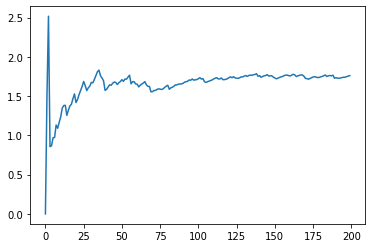

In [193]:
n = 200
y_axis = np.zeros(n)

v_arrival = [rnd.random() for i in range(n + 1000)]
v_departure1 = [rnd.random() for i in range(n + 100)]
v_departure2 = [rnd.random() for i in range(n + 100)]
v_departure3 = [rnd.random() for i in range(n + 100)]
v_departure4 = [rnd.random() for i in range(n + 100)]

mu_rates =  [2.9, 2.2, 2.2, 2.8]

for i in range(1,n):
    v_arrival_temp = [i for i in v_arrival]
    v_dep1_temp = [i for i in v_departure1]
    v_dep2_temp = [i for i in v_departure2]
    v_dep3_temp = [i for i in v_departure3]
    v_dep4_temp = [i for i in v_departure4]
    y_axis[i] = simulationRun(i, mu_rates, v_arrival_temp, v_dep1_temp, v_dep2_temp, v_dep3_temp, v_dep4_temp)[0]

plt.plot(y_axis)


In [194]:
def Simulations(n_simulations,numberOfCustomers, mu_rates):     

    results = [simulationRun(
        numberOfCustomers, 
        mu_rates,
        v_arrival = [rnd.random() for i in range(numberOfCustomers + 1000)], 
        v_departure1 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure2 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure3 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure4 = [rnd.random() for i in range(numberOfCustomers + 100)]        
        ) for i in range(1, n_simulations)]
    return results

In [195]:
mu_rates =  [2.9, 2.2, 2.2, 2.8]
Simulations(1000,100, mu_rates)

[(1.7094251155478775,
  100,
  -35.54130626410555,
  -37.767098095780575,
  -37.88983130654802,
  -34.02061487393189),
 (1.6555512568193962,
  100,
  -37.514106131372465,
  -39.705868277128694,
  -37.901144586137725,
  -33.601864526468766),
 (1.5729376418905172,
  100,
  -37.018510598504996,
  -39.38122806905436,
  -37.02773785056913,
  -33.968146738970646),
 (1.6999724168227894,
  100,
  -37.33098514135966,
  -40.038086354780496,
  -38.512226617270386,
  -34.26501372162957),
 (1.4847620912903436,
  100,
  -38.2348808285411,
  -40.47050282172594,
  -36.70451005387106,
  -34.18073752727987),
 (1.5587153353267258,
  100,
  -37.39885702900106,
  -41.7384671460378,
  -38.994648996811996,
  -33.9728715674806),
 (1.729241103972855,
  100,
  -37.50063697836486,
  -40.62881430496404,
  -37.44054391477097,
  -33.71454289106613),
 (1.689178202089734,
  100,
  -37.65960598905961,
  -42.295072793252494,
  -39.6825415299434,
  -34.15698489088069),
 (1.8539333054475648,
  100,
  -35.53914899186294,


## OPTIMIZATION
# Initial value theta_0
$$\theta_0 = $$

# Stepsize rule 
$$ \eta_n = \frac{1}{n+1} $$

# Descent direction: Based on SFM estimator 

# Stopping rule 


In [199]:
def calculate_energy_costs(mu_rates):
    return (2 / mu_rates[1]) + (1 / mu_rates[2])

def cost_function(mu_rates, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4):
    v_arrival_temp = [i for i in v_arrival]
    v_dep1_temp = [i for i in v_departure1]
    v_dep2_temp = [i for i in v_departure2]
    v_dep3_temp = [i for i in v_departure3]
    v_dep4_temp = [i for i in v_departure4]
    
    return simulationRun(numberOfCustomers, mu_rates, v_arrival_temp, v_dep1_temp, v_dep2_temp, v_dep3_temp, v_dep4_temp) + calculate_energy_costs(mu_rates)

def gradient(mu_rates, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4): 
    v_arrival_temp = [i for i in v_arrival]
    v_dep1_temp = [i for i in v_departure1]
    v_dep2_temp = [i for i in v_departure2]
    v_dep3_temp = [i for i in v_departure3]
    v_dep4_temp = [i for i in v_departure4]
    
    simulation = simulationRun(numberOfCustomers, mu_rates, v_arrival_temp, v_dep1_temp, v_dep2_temp, v_dep3_temp, v_dep4_temp)
    return simulation[0] * np.array(simulation[2:])

def epsilon_function(n): 
    return 1/ (n+1)
    

In [200]:
v_arrival = [rnd.random() for i in range(n + 1000)]
v_departure1 = [rnd.random() for i in range(n + 100)]
v_departure2 = [rnd.random() for i in range(n + 100)]
v_departure3 = [rnd.random() for i in range(n + 100)]
v_departure4 = [rnd.random() for i in range(n + 100)]
gradient(mu_rates, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4)

array([-52.40253685, -54.92886668, -53.22283289, -46.8286164 ])

In [203]:
def stochasticOptimization(m, mu_0, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4): 
    ''' 
    @param m = number of iterations

    '''
    v_mu_rates = np.zeros((m,4))
    #v_costFunction = np.zeros(m)

    v_mu_rates[0] = mu_0

    for i in range(m-1): 
        #v_costFunction[i] = cost_function(v_mu_rates[i])

        v_mu_rates[i+1] = v_mu_rates[i] + epsilon_function(i) * gradient(v_mu_rates[i], v_arrival, v_departure1, v_departure2, v_departure3, v_departure4)
    
    return v_mu_rates





In [205]:
numberOfCustomers = 75
v_arrival = [rnd.random() for i in range(n + 1000)]
v_departure1 = [rnd.random() for i in range(n + 100)]
v_departure2 = [rnd.random() for i in range(n + 100)]
v_departure3 = [rnd.random() for i in range(n + 100)]
v_departure4 = [rnd.random() for i in range(n + 100)]

stochasticOptimization(15, [2.9, 2.2, 2.2, 2.6], v_arrival, v_departure1, v_departure2, v_departure3, v_departure4)


array([[   2.9       ,    2.2       ,    2.2       ,    2.6       ],
       [ -40.65092801,  -43.1598831 ,  -43.84203689,  -37.14852002],
       [ -62.42639201,  -65.83982465,  -66.86305534,  -57.02278003],
       [ -76.94336801,  -80.95978569,  -82.21040097,  -70.2722867 ],
       [ -87.83110001,  -92.29975646,  -93.72091019,  -80.20941671],
       [ -96.54128562, -101.37173309, -102.92931757,  -88.15912071],
       [-103.79977362, -108.9317136 , -110.60299038,  -94.78387405],
       [-110.02133476, -115.4116969 , -117.18042423, -100.46223405],
       [-115.46520076, -121.08168229, -122.93567884, -105.43079905],
       [-120.30419276, -126.1216693 , -128.05146071, -109.84730127],
       [-124.65928556, -130.65765761, -132.6556644 , -113.82215328],
       [-128.61846084, -134.78128335, -136.84130412, -117.4356551 ],
       [-132.24770484, -138.56127361, -140.67814053, -120.74803176],
       [-135.59777622, -142.05049538, -144.21983567, -123.80561023],
       [-138.70855679, -145.290487